# Distributions and Estimators

G. Richards
(2016, 2018, 2020)

Resources for this material include Ivezic Sections 3.3-3.5, Karen' Leighly's [Bayesian Statistics Lecture](http://seminar.ouml.org/lectures/bayesian-statistics/), and [Bevington's book](http://hosting.astro.cornell.edu/academics/courses/astro3310/Books/Bevington_opt.pdf).

## Distributions

If we are attempting to characterize our data in a way that is **parameterized**, then we need a functional form or a **distribution**.  There are many naturally occurring distributions.  The book goes through quite a few of them.  Here we'll just talk about a few basic ones to get us started.


### Uniform Distribution

The uniform distribution is perhaps more commonly called a "top-hat" or a "box" distribution.  It is specified by a mean, $\mu$, and a width, $W$, where

$$p(x|\mu,W) = \frac{1}{W}$$

over the range $|x-\mu|\le \frac{W}{2}$ and $0$ otherwise.  That says that "given $\mu$ AND $W$, the probability of $x$ is $\frac{1}{W}$" (as long as we are within a certain range).

Since we are used to thinking of a Gaussian as the *only* type of distribution the concept of $\sigma$ (aside from the width) may seem strange.  But $\sigma$ as mathematically defined last time applies here and is
$$\sigma = \frac{W}{\sqrt{12}}.$$


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/astroML/linear_model/linear_regression_errors.py:8: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


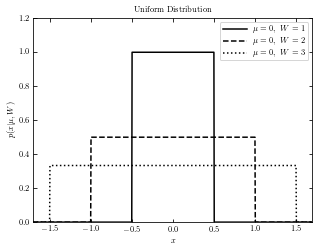

<Figure size 432x288 with 0 Axes>

In [3]:
# Execute this cell
# Note that if you moved the file out of the git repo, this path will be wrong
# You will need to change the path, copy the code, etc.
# Or perhaps just work in the git repo and change the name of the file before moving it later.
%matplotlib inline
%run ../../PHYS_440_540/code/fig_uniform_distribution.py

We can implement [uniform](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform) in `scipy` as follows.  We'll use the methods listed at the bottom of the link to complete the cell: `dist.rvs(size=N)` which produces `N` random draws from the distribution and `dist.pdf(x)` which returns the value of the pdf at a given $x$.  First create a uniform distribution with parameters `loc=0`,  `scale=2`, and `N=10`.

In [2]:
# Complete and execute this cell
from scipy import stats
import numpy as np
N = 10 #Complete
distU = stats.uniform(loc=0,scale=2) #Complete
draws = distU.rvs(size=N) # ten random draws
print(draws)
p = distU.pdf(1) #pdf evaluated at x=1
print(p)

[0.07246436 1.05111841 1.42748788 1.92544609 1.32288743 0.7075641
 0.46240913 1.39074823 1.39386085 0.84867113]
0.5


Did you expect that answer for the pdf?  Why?  What would the pdf be if you changed the width to 4?

### Gaussian Distribution

We have already seen that the Gaussian distribution is given by
$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

It is also called the **normal distribution** and can be noted by $\mathscr{N}(\mu,\sigma)$.


Note that the convolution of two Gaussians results in a Gaussian.  So $\mathscr{N}(\mu,\sigma)$ convolved with $\mathscr{N}(\nu,\rho)$ is $\mathscr{N}(\mu+\nu,\sqrt{\sigma^2+\rho^2})$

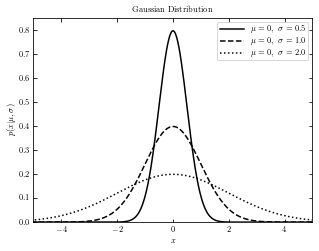

<Figure size 432x288 with 0 Axes>

In [5]:
# Execute this cell
%run ../../PHYS_440_540/code/fig_gaussian_distribution.py

In [ ]:
# %load ../../PHYS_440_540/code/fig_gaussian_distribution.py
"""
Example of a Gaussian distribution
----------------------------------
Figure 3.8.

This shows an example of a gaussian distribution with various parameters.
We'll generate the distribution using::

    dist = scipy.stats.norm(...)

Where ... should be filled in with the desired distribution parameters
Once we have defined the distribution parameters in this way, these
distribution objects have many useful methods; for example:

* ``dist.pmf(x)`` computes the Probability Mass Function at values ``x``
  in the case of discrete distributions

* ``dist.pdf(x)`` computes the Probability Density Function at values ``x``
  in the case of continuous distributions

* ``dist.rvs(N)`` computes ``N`` random variables distributed according
  to the given distribution

Many further options exist; refer to the documentation of ``scipy.stats``
for more details.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Define the distributions to be plotted
sigma_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for sigma, ls in zip(sigma_values, linestyles):
    # create a gaussian / normal distribution
    dist = norm(mu, sigma)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma))

plt.xlim(-5, 5)
plt.ylim(0, 0.85)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')

plt.legend()
plt.show()


Let's get some practice!  See http://www.astroml.org/book_figures/chapter3/fig_gaussian_distribution.html

In the same manner as above, create a [normal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html?highlight=stats%20norm#scipy.stats.norm) with `loc=100` and `scale=15`.  Produce 10 random draws and determine the probability at `x=145`.

This will be helpful to us in our later example with IQ tests, since IQ is distributed (by definition) 
as $\mathscr{N}$(mu=100,sigma=15)

In [16]:
# Complete and execute this cell
distG = stats.norm(loc=100,scale=15) # Normal distribution with mean = 100, stdev = 15
draws = distG.rvs(size=N) # 10 random draws
p = distG.pdf(0) # pdf evaluated at x=0
print(draws)
print(p)

[ 89.26682678 102.43718597 107.93155816  95.74411831  71.68559945
  87.5177435  104.68569885  77.11766755 105.02945601  97.72691358]
5.940600124901435e-12


Now let's plot that.  Have the plot sample the distribution 1000 times from 0 to 200.  

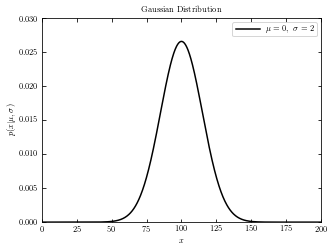

In [10]:
## Let's play with Gaussians! Or Normal distributions, N(mu,sigma)
## see http://www.astroml.org/book_figures/chapter3/fig_gaussian_distribution.html
## Example: IQ is (by definition) distributed as N(mu=100,sigma=15)

xgrid = np.linspace(0,200,1000) # generate distribution for a uniform grid of x values
gaussPDF = distG.pdf(xgrid)  # this is a function of xgrid

# actual plotting
fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(xgrid, gaussPDF, ls='-', c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()

Above we plotted probability density function.  Sometimes what you want instead is the cumulative distribution function, cdf.  The CDF is the integral of pdf from $x'=-\infty$ to $x'=x$:
$${\rm CDF}(x|\mu,\sigma) = \int_{-\infty}^{x'} p(x'|\mu,\sigma) dx',$$
where
${\rm CDF}(\infty) = 1$.

You will get some practice with CDFs in the Data Camp homework assignment.

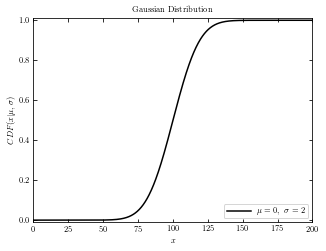

In [11]:
#The same as above but now with the cdf method
gaussCDF = distG.cdf(xgrid)
fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(xgrid, gaussCDF, ls='-', c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
plt.xlim(0, 200)
plt.ylim(-0.01, 1.01)
plt.xlabel('$x$')
plt.ylabel(r'$CDF(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend(loc=4)

What fraction of people have IQ>145?  First let's determine that using the theoretical CDF, using the `sf()` method of [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).  Then we'll try try a brute force method, simulating it using `sampleSize=1000000`.

In [12]:
#What fraction of people have IQ>145?
#cdf is fraction of people with IQ<=145, 1-cdf is IQ>145
#sf (survival function) is 1-cdf, which is what we want in this case
sf145 = distG.sf(145)
print(sf145)

0.0013498980316300933


Did you get 0.13% (or 0.0013)?

Basically this is doing the CDF integral in the opposite direction.  Start at $x=\infty$ and integrate down the curve to the value of interest (here $x=145$), then report the fraction of the time values in that range (145 and above) are expected given the known distribution.

In [20]:
# let's now look at the same problems using a sample of a million points drawn from N(100,15)
sampleSize=1000000
gaussSample = distG.rvs(sampleSize) 
smartOnes = gaussSample[gaussSample>145] #Extract only those draws with >145
FracSmartOnes = 1.0*np.size(smartOnes)/sampleSize
print(FracSmartOnes)

0.001324


How about the IQ that corresponds to "one in a million"?   Here we want the inverse survival function, `isf()`.  Note that the inverse of the cdf is `ppf()`, the percent point function.

In [22]:
OneInAMillionVal = distG.isf(1/1000000) #Complete

print('IQ=', OneInAMillionVal)

IQ= 171.30136463234348


In [24]:
#What is another way you could estimate this with `gaussSample`?
#Think about how you can take advantage of the sampleSize we used above.

print(np.max(gaussSample))

171.78913224441675


### Gaussian confidence levels

The probability of a measurement drawn from a Gaussian distribution that is between $\mu-a$ and $\mu+b$ is
$$\int_{\mu-a}^{\mu+b} p(x|\mu,\sigma) dx.$$
For $a=b=1\sigma$, we get the familar result of 68.3%.  For $a=b=2\sigma$ it is 95.4%.  So we refer to the range $\mu \pm 1\sigma$ and $\mu \pm 2\sigma$ as the 68% and 95% **confidence limits**, respectively.

Note that if your distribution is not Gaussian, then these confidence intervals will be different!

Can you figure out what the probability is for $-2\sigma, +4\sigma$?  Check to see that you get the right answer for the cases above first!

You'll get some practice with this in a Data Camp lesson next week (after we talk about Bootstrap and Jackknife estimates).

In [3]:
# Complete and execute this cell
N=10000
mu=0
sigma=1
distN = stats.norm(mu, sigma) # Complete
xgrid = np.linspace(-2,4,N) # Complete
dx = (xgrid.max()-xgrid.min())/N
prob = distN.pdf(xgrid)*dx
print(prob.sum())

0.977136709173485


We could do this a number of different ways.   I did it this way so that we could see what is going on.  Basically using the trapezoidal method, computing the height and the width and summing them up.  We'll do it below with the CDF and check that the answer is the same.

In [4]:
upper = distN.cdf(4)
lower = distN.cdf(-2)
p = upper-lower
print(p)

0.9772181968099877


### Log Normal

If $x$ is Gaussian distributed with $\mathscr{N}(\mu,\sigma)$, then $y=\exp(x)$ will have a **log-normal** distribution, where the mean of y is $\exp(\mu + \sigma^2/2)$.  Try it.

In [5]:
# Execute this cell
import numpy as np
x = stats.norm(0,1) # mean = 0, stdev = 1
y = np.exp(x.rvs(100))
print(y.mean())
print(x)

1.8340606886578252


The catch here is that stats.norm(0,1) returns an *object* and not something that we can just do math on in the expected manner.  What *can* you do with it?  Try ```dir(x)``` to get a list of all the methods and properties.

In [6]:
import math
# Complete and execute this cell
distLN = stats.norm(0,1) # mean = 0, stdev = 1
x = distLN.rvs(10000)
y = np.exp(x)
print(math.exp(0+1*1/2.0), y.mean())

1.6487212707001282 1.655107330608924


### $\chi^2$ Distribution

We'll run into the $\chi^2$ distribution when we talk about Maximum Likelihood in the next chapter.

If we have a Gaussian distribution with values ${x_i}$, and we scale and normalize them according to
$$z_i = \frac{x_i-\mu}{\sigma},$$
then the sum of squares, $Q$ 
$$Q = \sum_{i=1}^N z_i^2,$$
will follow the $\chi^2$ distribution.  The *number of degrees of freedom*, $k$, is given by the number of data points, $N$ (minus any constraints).  The pdf of $Q$ given $k$ defines $\chi^2$ and is given by
$$p(Q|k)\equiv \chi^2(Q|k) = \frac{1}{2^{k/2}\Gamma(k/2)}Q^{k/2-1}\exp(-Q/2),$$
where $Q>0$ and the $\Gamma$ function would just be the usual factorial function if we were dealing with integers, but here we have half integers.

This is ugly, but it is really just a formula like anything else.  Note that the shape of the distribution *only* depends on the sample size $N=k$ and not on $\mu$ or $\sigma$.  

In [ ]:
# %load ../../PHYS_440_540/code/fig_chi2_distribution.py
r"""
Example of a chi-squared distribution
---------------------------------------
Figure 3.14.

This shows an example of a :math:`\chi^2` distribution with various parameters.
We'll generate the distribution using::

    dist = scipy.stats.chi2(...)

Where ... should be filled in with the desired distribution parameters
Once we have defined the distribution parameters in this way, these
distribution objects have many useful methods; for example:

* ``dist.pmf(x)`` computes the Probability Mass Function at values ``x``
  in the case of discrete distributions

* ``dist.pdf(x)`` computes the Probability Density Function at values ``x``
  in the case of continuous distributions

* ``dist.rvs(N)`` computes ``N`` random variables distributed according
  to the given distribution

Many further options exist; refer to the documentation of ``scipy.stats``
for more details.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import chi2
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Define the distribution parameters to be plotted
k_values = [1, 2, 5, 7]
linestyles = ['-', '--', ':', '-.']
mu = 0
x = np.linspace(-1, 20, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))
fig.subplots_adjust(bottom=0.12)

for k, ls in zip(k_values, linestyles):
    dist = chi2(k, mu)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$k=%i$' % k)

plt.xlim(0, 10)
plt.ylim(0, 0.5)

plt.xlabel('$Q$')
plt.ylabel(r'$p(Q|k)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')

plt.legend()
plt.show()


### Chi-squared per degree of freedom

In practice we frequently divide $\chi^2$ by the number of degrees of freedom, and work with:

$$\chi^2_{dof} = \frac{1}{N-1} \sum_{i=1}^N \left(\frac{x_i-\overline{x}}{\sigma}\right)^2$$

which (for large $k$) is distributed as

$$ p(\chi^2_{dof}) \sim \mathscr{N}\left(1, \sqrt{\frac{2}{N-1}}\right) $$

(where $k = N-1$, and $N$ is the number of samples). Therefore, we expect $\chi^2_{dof}$ to be 1, to within a few $\sqrt{\frac{2}{N-1}}$.

See the [Khan Academy's chi-square distribution introduction](https://www.khanacademy.org/math/statistics-probability/inference-categorical-data-chi-square-tests/chi-square-goodness-of-fit-tests/v/chi-square-distribution-introduction), which is actually somewhat confusing but shows how to use probability tables (starting at 7:50) to get so-called $p$-values.

If you are so inclined, you could look ahead to next week a bit and watch the video on Least-squares regression
https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/regression-library/v/introduction-to-residuals-and-least-squares-regression

### Student's $t$ Distribution

Another distribution that we'll see later is the Student's $t$ Distribution.

If you have a sample of $N$ measurements, $\{x_i\}$, drawn from a Gaussian distribution, $\mathscr{N}(\mu,\sigma)$, and you apply the transform
$$t = \frac{\overline{x}-\mu}{s/\sqrt{N}},$$
then $t$ will be distributed according to Student's $t$ with the following pdf (for $k$ degrees of freedom): 
$$p(x|k) = \frac{\Gamma(\frac{k+1}{2})}{\sqrt{\pi k} \Gamma(\frac{k}{2})} \left(1+\frac{x^2}{k}\right)^{-\frac{k+1}{2}}$$

As with a Gaussian, Student's $t$ is bell shaped, but has "heavier" tails.

Note the similarity between $t$ and $z$ for a Gaussian, which reflects the difference between estimates of the mean and standard deviation and their true values.  (Which means that often you should be using a $t$-distribution instead of a normal distribution, but the difference goes away for large enough $k$, so shouldn't matter for "Big Data").

In [ ]:
# %load ../../PHYS_440_540/code/fig_student_t_distribution.py
"""
Example of Student's t distribution
-----------------------------------
Figure 3.15.

This shows an example of Student's t distribution with various parameters.
We'll generate the distribution using::

    dist = scipy.stats.student_t(...)

Where ... should be filled in with the desired distribution parameters
Once we have defined the distribution parameters in this way, these
distribution objects have many useful methods; for example:

* ``dist.pmf(x)`` computes the Probability Mass Function at values ``x``
  in the case of discrete distributions

* ``dist.pdf(x)`` computes the Probability Density Function at values ``x``
  in the case of continuous distributions

* ``dist.rvs(N)`` computes ``N`` random variables distributed according
  to the given distribution

Many further options exist; refer to the documentation of ``scipy.stats``
for more details.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import t as student_t
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Define the distribution parameters to be plotted
mu = 0
k_values = [1E10, 2, 1, 0.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(-10, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for k, ls in zip(k_values, linestyles):
    dist = student_t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}(k=\infty)$'
    else:
        label = r'$\mathrm{t}(k=%.1f)$' % k

    plt.plot(x, dist.pdf(x), ls=ls, c='black', label=label)

plt.xlim(-5, 5)
plt.ylim(0.0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k)$')
plt.title("Student's $t$ Distribution")

plt.legend()
plt.show()


### What's the point?

The point is that we are going to make some measurement.  And we will want to know how likely it is that we would get that measurement in our experiment as compared to random chance.  To determine that we need to know the shape of the distribution.  Let's say that we find that $x=6$.  If our data is $\chi^2$ distributed with 2 degrees of freedom, then we would integrate the $k=2$ curve above from 6 to $\infty$ to determine how likely it is that we would have gotten 6 or larger by chance.  If our distribution was instead $t$ distributed, we would get a *very* different answer.  Note that it is important that you decide *ahead of time* what the metric will be for deciding whether this result is significant or not.  More on this later, but see [this article](http://fivethirtyeight.com/features/science-isnt-broken/).

## Central Limit Theorem

One of the reasons that a Gaussian (or Normal) Distribution is so common is because of the **Central Limit Theorem**. It says that for an arbitrary distribution, $h(x)$, that has a well-defined mean, $\mu$, and standard deviation, $\sigma$, the mean of $N$ values \{$x_i$\} drawn from the distribution will follow a Gaussian Distribution with $\mathscr{N}(\mu,\sigma/\sqrt{N})$.  (A Cauchy distribution is one example where this fails.)

This theorem is the foudation for the performing repeat measurements in order to improve the accuracy of one's experiment.  It is telling us something about the *shape* of the distribution that we get when averaging.  The **Law of Large Numbers** further says that the sample mean will converge to the distribution mean as $N$ increases.

Personally, I always find this a bit confusing (or at least I forget how it works).  So, let's look at it in detail.
Start by plotting a normal distribution with $\mu=0.5$ and $\sigma=1/\sqrt{12}/\sqrt{2}$.

Now take `N=2` draws using the `np.random.random` distribution and plot them as a rug plot.  Do that a couple of times (e.g., keep hitting Cntrl-Enter in the cell).

Text(0, 0.5, 'pdf')

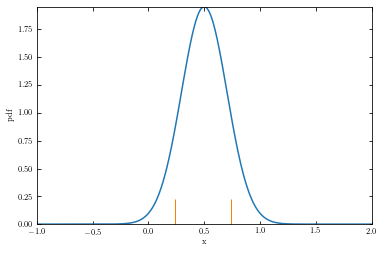

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N=2 # Number of draws
mu=0.5 # Location
sigma =1.0/np.sqrt(12)/np.sqrt(N) # Sqrt(N) properly normalizes the pdf

xgrid = np.linspace(-1,2,1000) # Array to sample the space 
distG = stats.norm(mu,sigma) # Complete
plt.plot(xgrid,distG.pdf(xgrid)) # Complete

x = np.random.random(N) # Two random draws
plt.plot(x, 0*x, '|', markersize=50)
plt.xlabel('x')
plt.ylabel('pdf')

Now let's average those two draws and plot the result (in the same panel).  Do it as a histogram for 1,000,000 samples (of 2 each).  Use a stepfilled histogram that is normalized with 50% transparency and 100 bins.

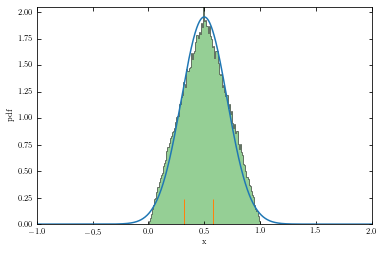

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N=2 # Number of draws
mu=0.5 # Location
sigma = 1.0/np.sqrt(12)/np.sqrt(N)  # Scale factor

xgrid = np.linspace(-1,2,1000) # Array to sample the space
distG = stats.norm(mu,sigma) # Complete
plt.plot(xgrid,distG.pdf(xgrid)) # Complete

x = np.random.random(N) # N random draws
plt.plot(x, 0*x, '|', markersize=50)
plt.xlabel('x')
plt.ylabel('pdf')

# Add a histogram that is the mean of 1,000,000 draws
yy = []
for i in np.arange(100000):
    xx = np.random.random(N) # N random draws
    yy.append(np.mean(xx)) # Append average of those random draws to the end of the array

_ = plt.hist(yy,bins=100,histtype='stepfilled', alpha=0.5, density=True)

Now instead of averaging 2 draws, average 3.  Then do it for 10.  Then for 100.  Each time for 1,000,000 samples.


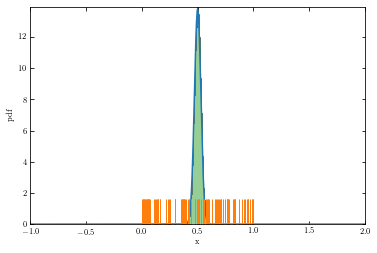

In [15]:
# Copy your code from above and edit accordingly (or just edit your code from above)
N=100 # Number of draws
mu=0.5 # Location
sigma = 1.0/np.sqrt(12)/np.sqrt(N)  # Scale factor

xgrid = np.linspace(-1,2,1000) # Array to sample the space
distG = stats.norm(mu,sigma) # Complete
plt.plot(xgrid,distG.pdf(xgrid)) # Complete

x = np.random.random(N) # N random draws
plt.plot(x, 0*x, '|', markersize=50)
plt.xlabel('x')
plt.ylabel('pdf')

# Add a histogram that is the mean of 1,000,000 draws
yy = []
for i in np.arange(100000):
    xx = np.random.random(N) # N random draws
    yy.append(np.mean(xx)) # Append average of those random draws to the end of the array

_ = plt.hist(yy,bins=100,histtype='stepfilled', alpha=0.5, density=True)

For 100 you will note that your draws are clearly sampling the full range, but the means of those draws are in a *much* more restrictred range.  Moreover they are very closely following a Normal Distribution.  This is the power of the Central Limit Theorem.    We'll see this more later when we talk about **maximum likelihood**.

By the way, if your code is ugly, you can run the following cell to reproduce Ivezic, Figure 3.20 which nicely illustrates this in one plot.

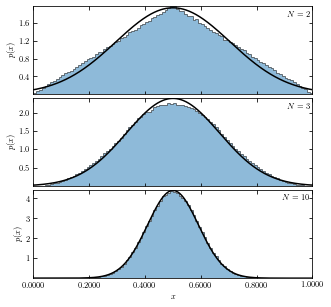

In [19]:
# %load ../../PHYS_440_540/code/fig_central_limit.py
r"""
Example of central limit theorem
--------------------------------
Figure 3.20.

An illustration of the central limit theorem. The histogram in each panel shows
the distribution of the mean value of N random variables drawn from the (0, 1)
range (a uniform distribution with :math:`\mu = 0.5` and W = 1; see eq. 3.39).
The distribution for N = 2 has a triangular shape and as N increases it becomes
increasingly similar to a Gaussian, in agreement with the central limit
theorem. The predicted normal distribution with :math:`\mu = 0.5` and
:math:`\sigma = 1/ \sqrt{12 N}` is shown by the line. Already for N = 10,
the "observed" distribution is essentially the same as the predicted
distribution.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate the uniform samples
N = [2, 3, 10]

np.random.seed(42)
x = np.random.random((max(N), int(1E6)))

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.05)

for i in range(len(N)):
    ax = fig.add_subplot(3, 1, i + 1)

    # take the mean of the first N[i] samples
    x_i = x[:N[i], :].mean(0)

    # histogram the data
    ax.hist(x_i, bins=np.linspace(0, 1, 101),
            histtype='stepfilled', alpha=0.5, density=True)

    # plot the expected gaussian pdf
    mu = 0.5
    sigma = 1. / np.sqrt(12 * N[i])
    dist = norm(mu, sigma)
    x_pdf = np.linspace(-0.5, 1.5, 1000)
    ax.plot(x_pdf, dist.pdf(x_pdf), '-k')

    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.001, None)

    ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    ax.text(0.99, 0.95, r"$N = %i$" % N[i],
            ha='right', va='top', transform=ax.transAxes)

    if i == len(N) - 1:
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))
        ax.set_xlabel(r'$x$')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylabel('$p(x)$')

plt.show()


If you are confused, then watch this video from the Khan Academy:
[https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library/sample-means/v/central-limit-theorem](https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library/sample-means/v/central-limit-theorem)

## Bivariate and Multivariate Distribution Functions

Up to now we have been dealing with one-dimensional distribution functions.  Let's now consider a two dimensional distribution $h(x,y)$ where $$\int_{-\infty}^{\infty}dx\int_{-\infty}^{\infty}h(x,y)dy = 1.$$  $h(x,y)$ is telling us the probability that $x$ is between $x$ and $dx$ and *also* that $y$ is between $y$ and $dy$.

Then we have the following definitions:

$$\sigma^2_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x)^2 h(x,y) dx dy$$

$$\sigma^2_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(y-\mu_y)^2 h(x,y) dx dy$$

$$\mu_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x h(x,y) dx dy$$

$$\sigma_{xy} = Cov(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x) (y-\mu_y) h(x,y) dx dy$$

If $x$ and $y$ are uncorrelated, then we can treat the system as two independent 1-D distributions.  This means that choosing a range on one variable has no effect on the distribution of the other.

We can write a 2-D Gaussian pdf as
$$p(x,y|\mu_x,\mu_y,\sigma_x,\sigma_y,\sigma_{xy}) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp\left(\frac{-z^2}{2(1-\rho^2)}\right),$$

where $$z^2 = \frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - 2\rho\frac{(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y},$$

with $$\rho = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$
as the (dimensionless) correlation coefficient.

If $x$ and $y$ are perfectly correlated then $\rho=\pm1$ and if they are uncorrelated, then $\rho=0$.

The pdf is now not a histogram, but rather a series of contours in the $x-y$ plane.   These are centered at $(x=\mu_x, y=\mu_y)$ and are tilted at angle $\alpha$, which is given by
$$\tan(2 \alpha) = 2\rho\frac{\sigma_x\sigma_y}{\sigma_x^2-\sigma_y^2} = 2\frac{\sigma_{xy}}{\sigma_x^2-\sigma_y^2}.$$

For example (Ivezic, Figure 3.22):
![Ivezic, Figure 3.22](http://www.astroml.org/_images/fig_bivariate_gaussian_1.png)

We can define new coordinate axes that are aligned with the minimum and maximum widths of the distribution.  These are called the **principal axes** and are given by
$$P_1 = (x-\mu_x)\cos\alpha + (y-\mu_y)\sin\alpha,$$
and
$$P_2 = -(x-\mu_x)\sin\alpha + (y-\mu_y)\cos\alpha.$$

The widths in this coordinate system are
$$\sigma^2_{1,2} = \frac{\sigma_x^2+\sigma_y^2}{2}\pm\sqrt{\left(\frac{\sigma_x^2-\sigma_y^2}{2}\right)^2 + \sigma^2_{xy}}.$$

Note that the correlation vanishes in this coordinate system (by definition) and the bivariate Gaussian is just a product of two univariate Gaussians.  This concept will be crucial for understanding Principal Component Analysis when we get to Chapter 7, where PCA extends this idea to even more dimensions.

In the univariate case we used $\overline{x}$ and $s$ to *estimate* $\mu$ and $\sigma$.  In the bivariate case we estimate 5 parameters: $(\overline{x},\overline{y},s_x,s_y,s_{xy})$.  

As with the univariate case, it is important to realize that outliers can bias these estimates and that it may be more appropriate to use the median rather than the mean as a more robust estimator for $\mu_x$ and $\mu_y$.  Similarly we want robust estimators for the other parameters of the fit.  We won't go into that in detail right now, but see Ivezic, Figure 3.23 for an example:

![Ivezic, Figure 3.23](http://www.astroml.org/_images/fig_robust_pca_1.png)

For an example of how to generate a bivariate distribution and plot confidence contours, execute the following cell.

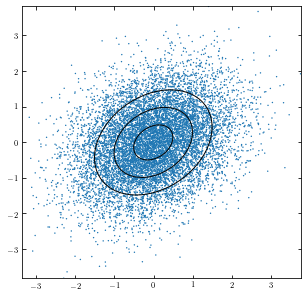

In [17]:
# Base code drawn from Ivezic, Figure 3.22, edited by G. Richards to simplify the example

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal
from astroML.stats import fit_bivariate_normal

mux = 0
muy = 0
sigx = 1.0
sigy = 1.0
sigxy = 0.3
#------------------------------------------------------------
# Create 10,000 points from a multivariate normal distribution
mean = [mux, muy]
cov = [[sigx, sigxy], [sigxy, sigy]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

# Fit those data with a bivariate normal distribution
mean, sigma_x, sigma_y, alpha = fit_bivariate_normal(x,y)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

plt.scatter(x,y,s=2,edgecolor='none')

# draw 1, 2, 3-sigma ellipses over the distribution
for N in (1, 2, 3):
    ax.add_patch(Ellipse(mean, N * sigma_x, N * sigma_y, angle=alpha * 180./np.pi, lw=1, ec='k', fc='none'))